In [22]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as scp
import netCDF4
import cartopy.crs as ccrs
import os

In [23]:
file_path1 = 'TropicsOcean.nc'

#Opening dataset for tropics                                   
dsT1 = xr.open_dataset(file_path1)


In [4]:
avg_dsMT = dsT1.mean(dim=['latitude', 'longitude'])  

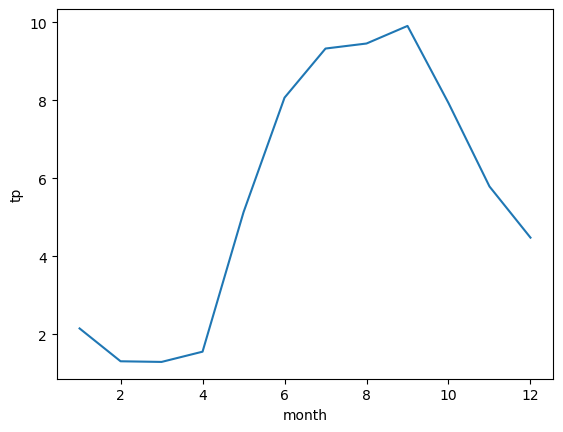

In [46]:
tp_mmpd = dsT1['tp']*1e3*24
tp_spatial = tp_mmpd.mean(dim = ['latitude','longitude'])
tp_seasonal = tp_spatial.groupby('time.month').mean()
tp_seasonal.plot()

In [8]:
First_monsoon = avg_dsMT.sel(time=avg_dsMT['time.month'].isin([4, 5, 6]))

Second_monsoon = avg_dsMT.sel(time=avg_dsMT['time.month'].isin([7, 8, 9]))

In [9]:
cape_bins = np.linspace(0, 2500, 17)
cins = []
tps = []
for data in (First_monsoon, Second_monsoon):
    positive_precip = data['tp'].where((data['tp']*24000) > 1.0)
    cape_positive_precip = data['cape'].where((data['tp']*24000) > 1.0)
    binned_precipitation = positive_precip.groupby_bins(cape_positive_precip, bins=cape_bins)
    binned_cin = data['cin'].groupby_bins(cape_positive_precip, bins=cape_bins)
    avgcin = binned_cin.mean()
    avgtp = binned_precipitation.mean()
    cape_mid = (cape_bins[1:] + cape_bins[:-1])/2
    cins.append(avgcin)
    tps.append(avgtp)

In [10]:
cins

[<xarray.DataArray 'cin' (cape_bins: 16)>
 array([102.53668 , 116.98246 , 111.49931 , 108.64097 , 115.20962 ,
        111.14875 , 111.94051 , 110.84342 , 116.610176, 119.32273 ,
        121.26773 , 126.65056 , 128.61775 , 133.49005 , 131.32834 ,
        138.43365 ], dtype=float32)
 Coordinates:
   * cape_bins  (cape_bins) object (0.0, 156.25] ... (2343.75, 2500.0],
 <xarray.DataArray 'cin' (cape_bins: 16)>
 array([148.63219 , 114.79778 ,  80.69737 ,  79.93128 ,  80.496   ,
         88.28723 ,  94.558   , 102.1356  , 105.631775, 111.3224  ,
        117.95098 , 124.587074, 136.23918 , 139.49466 , 145.75873 ,
        151.41115 ], dtype=float32)
 Coordinates:
   * cape_bins  (cape_bins) object (0.0, 156.25] ... (2343.75, 2500.0]]

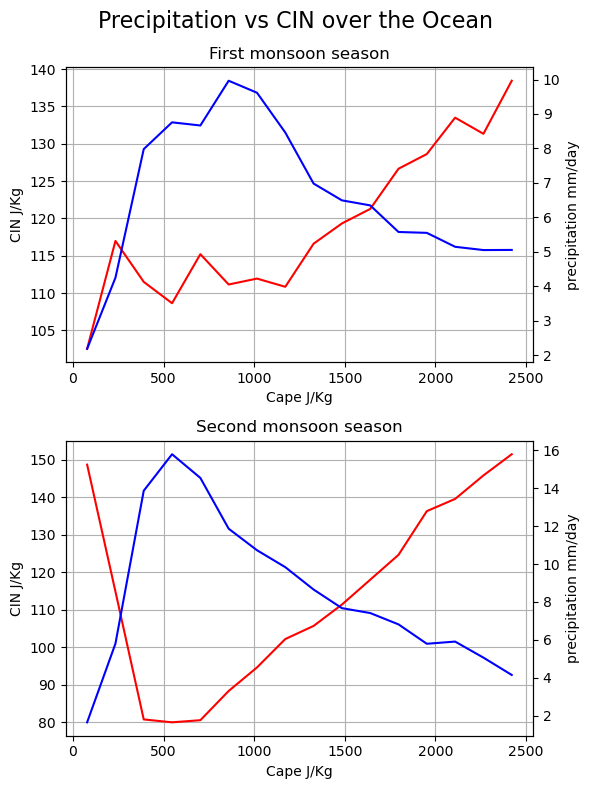

In [18]:
fig, axs = plt.subplots(2, 1, figsize=(6, 8))

# Assuming cins and tps are lists with two elements each
for idx, (season, avgcin, avgtp) in enumerate(zip(["First monsoon season", "Second monsoon season"], cins, tps)):

    axs[idx].plot(cape_mid, avgcin, color='r', label=f'{season}')
    axs[idx].set_xlabel('Cape J/Kg')
    axs[idx].set_ylabel('CIN J/Kg')
    axs[idx].set_title(f'{season}')
    axs[idx].grid(True)
    ax2 = axs[idx].twinx()
    ax2.plot(cape_mid, avgtp * 24000, 'b-', label='cape')
    ax2.set_ylabel('precipitation mm/day')
    ax2.tick_params(axis='y')

plt.suptitle("Precipitation vs CIN over the Ocean", fontsize=16)
plt.tight_layout()
plt.show()

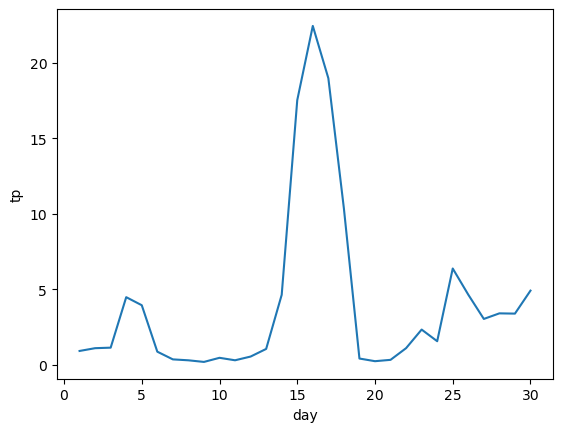

In [55]:
April08 = avg_dsMT.sel(time=slice('2008-04-01', '2008-04-30'))
April08_daily = April08.groupby('time.day').mean()
April08_tp = April08_daily['tp']*24000
April08_cape = April08_daily['cape']
April08_tp.plot()


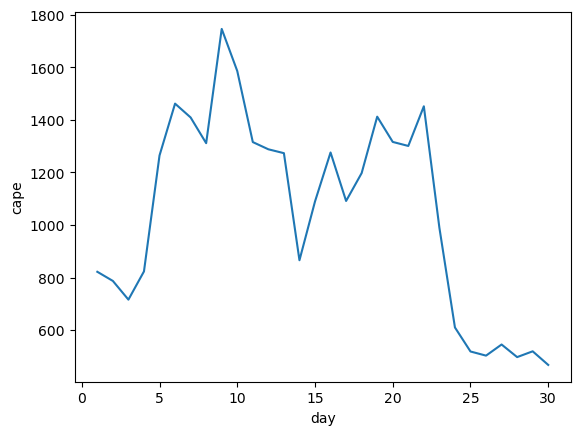

In [56]:
April08_cape.plot()

![](SouthChina.jpeg)